In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
data = pd.read_csv('/content/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Select numerical and postive variables as most of the transforms requires positive variables.
cols = []

for col in data.columns:
  if data[col].dtypes != 'O' and col != 'Id':
    if np.sum(np.where(data[col] <= 0, 1, 0)) == 0: # if varialbe is positive
       cols.append(col)    
      

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

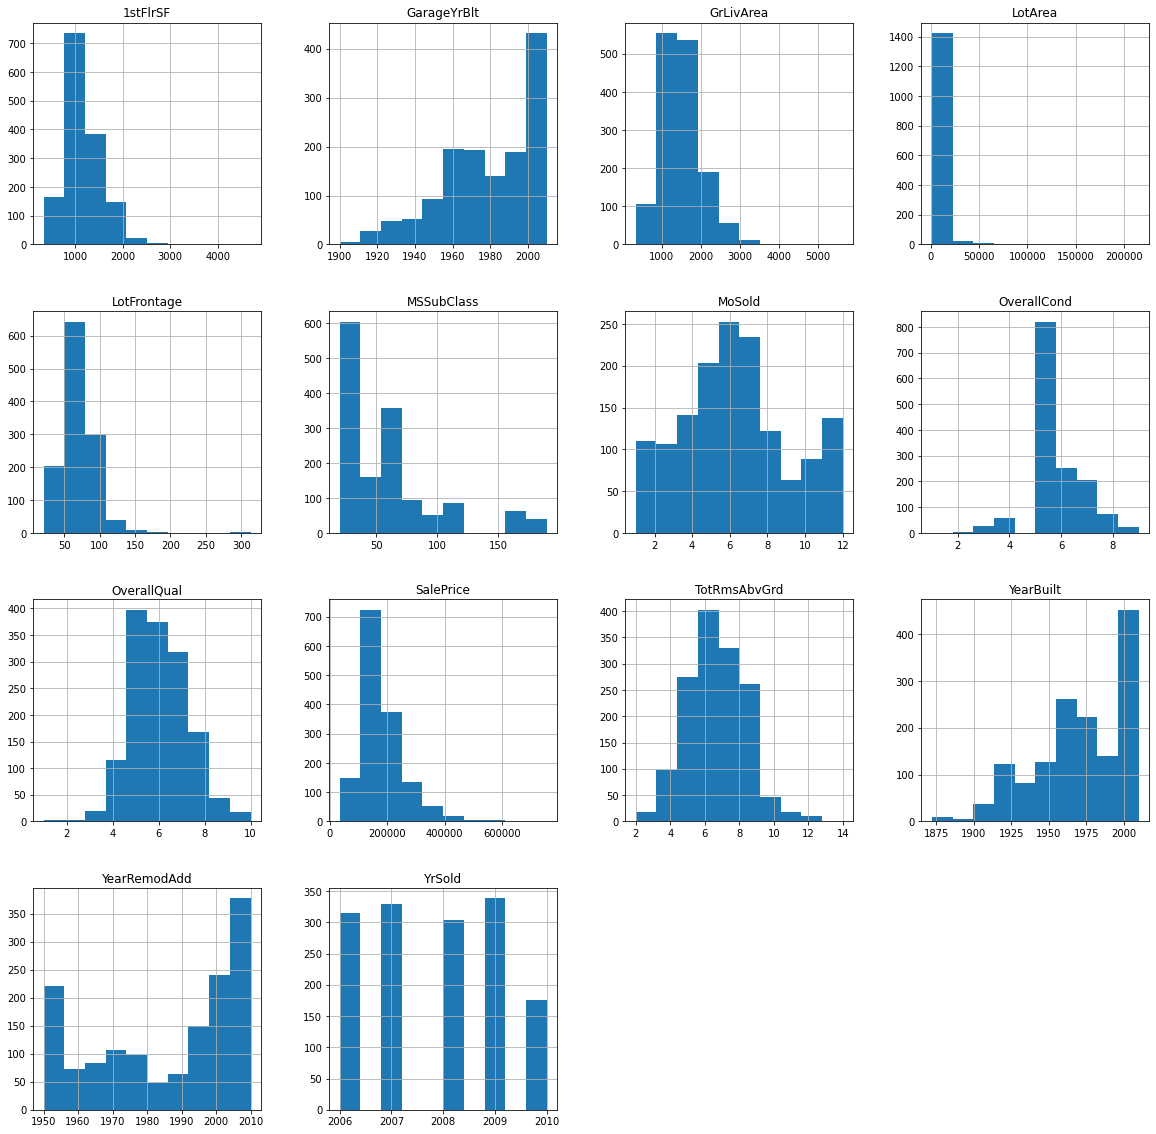

In [4]:
# Check distributions of the above variables using histogram:
data[cols].hist(figsize = (20,20))
plt.show()

In [0]:
# Plot to check normality
def creat_plots(df, var):
  plt.figure(figsize=(15,6))

  plt.subplots(1, 2, 1)
  df[var].hist(binds = 20)
  
  plt.subplots(1, 2, 2)
  stats.probplot(df[var], dist = 'norm', plot = plt)

  plt.show()


# **Logarithmic Transformation**

In [6]:
log_trans = FunctionTransformer(np.log, validate=True)
data_log_trans = log_trans.transform(data[cols].fillna(1))
data_log_trans = pd.DataFrame(data_log_trans, columns = cols)
data_log_trans.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,4.094345,4.174387,9.041922,1.945910,1.609438,7.602401,7.602401,6.752270,7.444249,2.079442,7.602401,0.693147,7.604894,12.247694
1,2.995732,4.382027,9.169518,1.791759,2.079442,7.588830,7.588830,7.140453,7.140453,1.791759,7.588830,1.609438,7.604396,12.109011
2,4.094345,4.219508,9.328123,1.945910,1.609438,7.601402,7.601902,6.824374,7.487734,1.791759,7.601402,2.197225,7.604894,12.317167
3,4.248495,4.094345,9.164296,1.945910,1.609438,7.557473,7.585789,6.867974,7.448334,1.945910,7.599902,0.693147,7.603898,11.849398
4,4.094345,4.430817,9.565214,2.079442,1.609438,7.600902,7.600902,7.043160,7.695303,2.197225,7.600902,2.484907,7.604894,12.429216


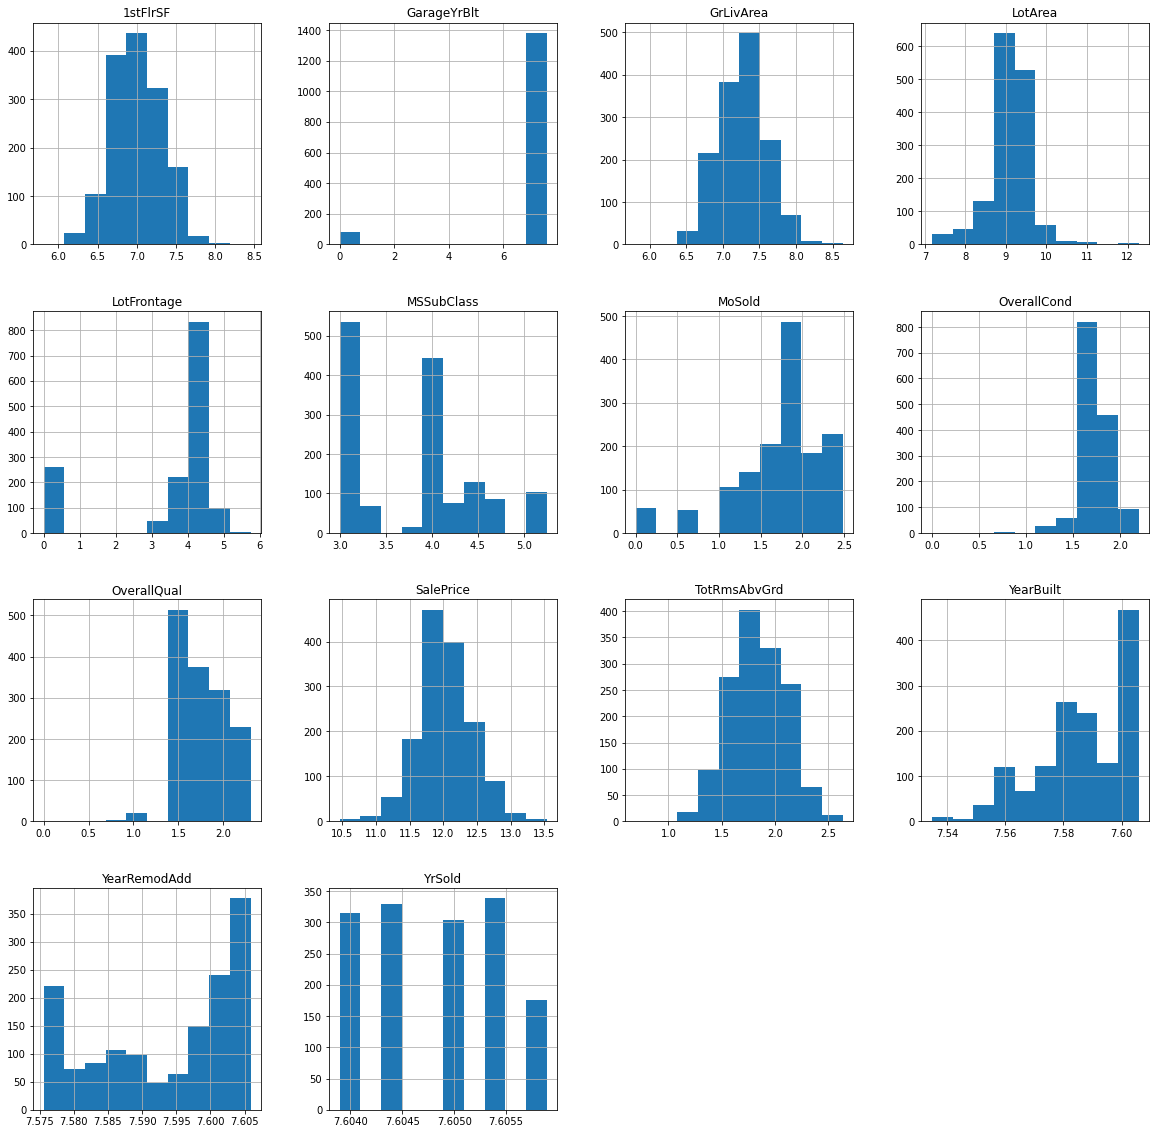

In [12]:
# Check distributions after transformation
data_log_trans.hist(figsize = (20,20))
plt.show()

# **Reciorical Transformation**

In [14]:
transformer = FunctionTransformer(np.reciprocal, validate=True) 
data_trans_reci = transformer.transform(data[cols].fillna(1))
data_trans_reci = pd.DataFrame(data_trans_reci, columns = cols)
data_trans_reci.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,0.016667,0.015385,0.000118,0.142857,0.200,0.000499,0.000499,0.001168,0.000585,0.125000,0.000499,0.500000,0.000498,0.000005
1,0.050000,0.012500,0.000104,0.166667,0.125,0.000506,0.000506,0.000792,0.000792,0.166667,0.000506,0.200000,0.000498,0.000006
2,0.016667,0.014706,0.000089,0.142857,0.200,0.000500,0.000500,0.001087,0.000560,0.166667,0.000500,0.111111,0.000498,0.000004
3,0.014286,0.016667,0.000105,0.142857,0.200,0.000522,0.000508,0.001041,0.000582,0.142857,0.000501,0.500000,0.000499,0.000007
4,0.016667,0.011905,0.000070,0.125000,0.200,0.000500,0.000500,0.000873,0.000455,0.111111,0.000500,0.083333,0.000498,0.000004


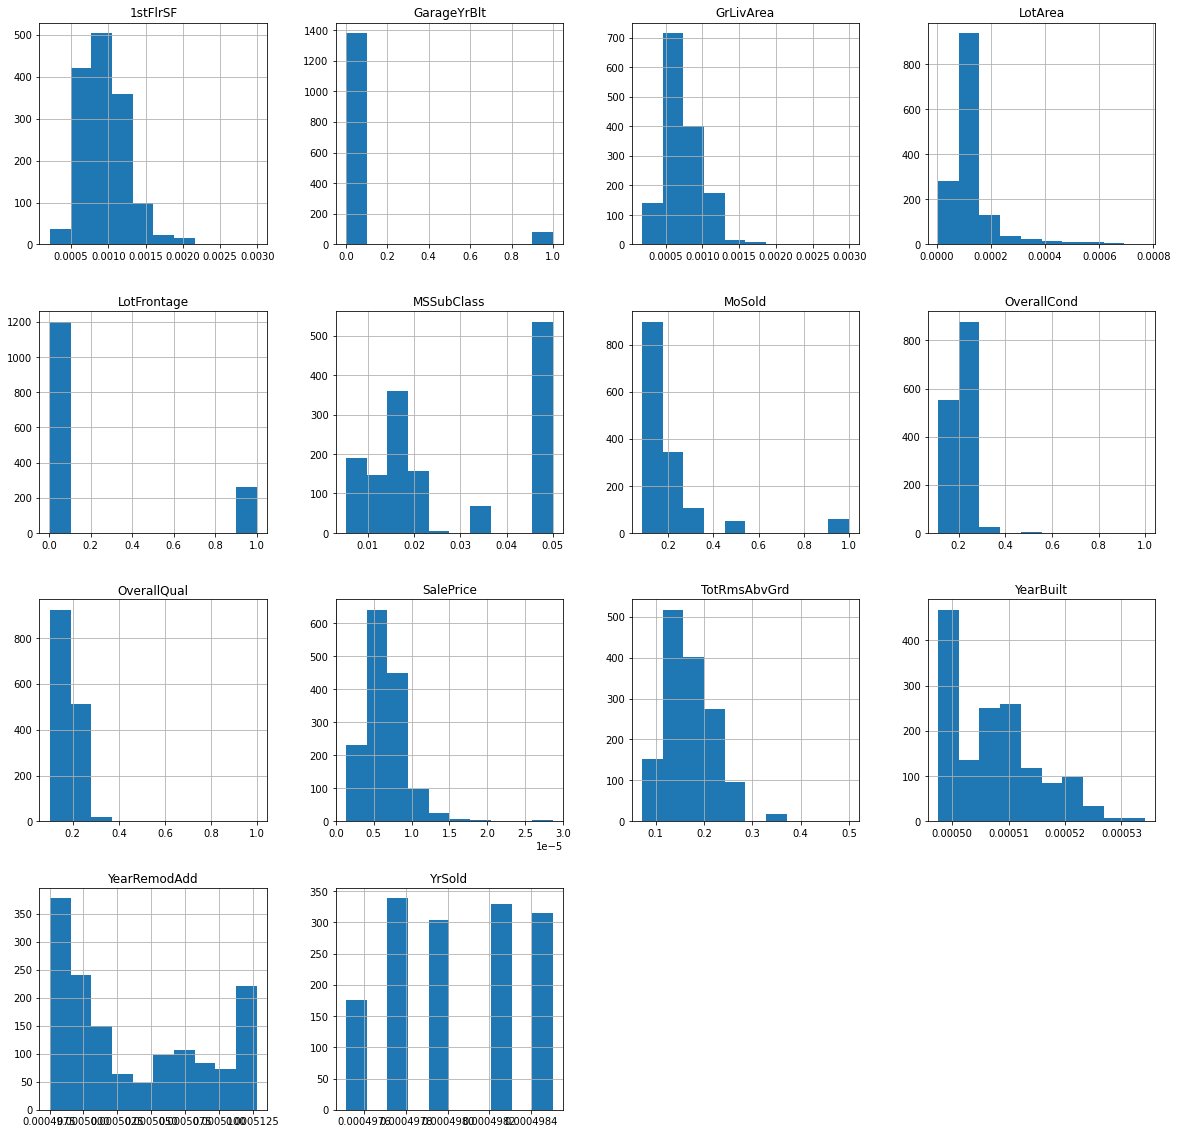

In [15]:
# Check distributions after transformation
data_trans_reci.hist(figsize = (20,20))
plt.show()

# **Exponential Transformation**

In [18]:
trans_exp = FunctionTransformer(lambda x : x**(1/1.2), validate=True)
data_exp_trans = trans_exp.transform(data[cols].fillna(1))
data_exp_trans = pd.DataFrame(data_exp_trans, columns= cols)
data_exp_trans.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,30.324434,32.416127,1872.322218,5.061140,3.823622,564.158052,564.158052,277.797375,494.496731,5.656854,564.158052,1.781797,565.331377,27076.241733
1,12.139245,38.539699,2082.377012,4.451018,5.656854,557.813624,557.813624,383.898247,383.898247,4.451018,557.813624,3.823622,565.096751,24121.104554
2,30.324434,33.658190,2376.623764,5.061140,3.823622,563.688585,563.923329,295.000797,512.744738,4.451018,563.688585,6.240251,565.331377,28690.047871
3,34.481147,30.324434,2073.334987,5.061140,3.823622,543.426295,556.401794,305.916444,496.183037,5.061140,562.984239,1.781797,564.862106,19428.533912
4,30.324434,40.138956,2895.784714,5.656854,3.823622,563.453823,563.453823,354.001068,609.569282,6.240251,563.453823,7.930813,565.331377,31498.026247


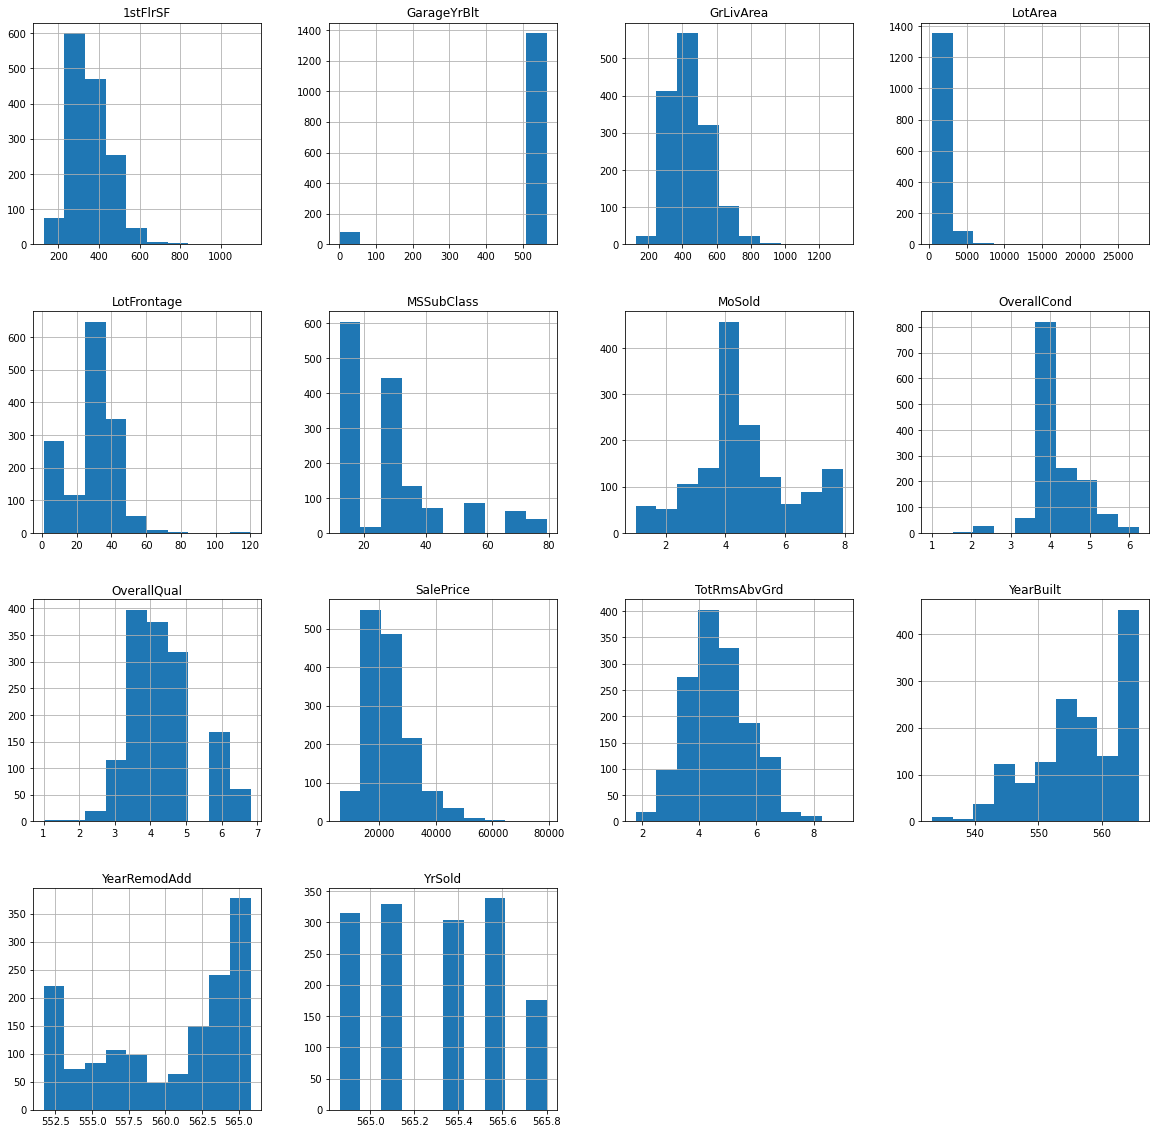

In [19]:
# Check distributions after transformation
data_exp_trans.hist(figsize = (20,20))
plt.show()

# **Box-Cox Transformation**

In [21]:
trans_bxcx = PowerTransformer(method='box-cox', standardize=False)
trans_bxcx.fit(data[cols].fillna(1))
trans_bxcx_data = trans_bxcx.transform(data[cols].fillna(1))
trans_bxcx_data = pd.DataFrame(trans_bxcx_data, columns=cols)
trans_bxcx_data.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,2.742416,27.882658,10.433680,4.470077,2.287343,4.754153e+71,2.162702e+132,5.235744,7.621711,2.631068,2.235779e+07,0.917985,0.004501,7.932610
1,2.220973,32.703200,10.602809,3.829085,3.297391,3.521422e+71,1.247060e+132,5.460253,7.303622,2.192232,2.165961e+07,3.204135,0.004501,7.878263
2,2.742416,28.868539,10.813973,4.470077,2.287343,4.650265e+71,2.119329e+132,5.277966,7.667292,2.192232,2.230564e+07,5.800476,0.004501,7.959618
3,2.806389,26.212170,10.595874,4.470077,2.287343,1.760075e+71,1.102322e+132,5.303382,7.625993,2.423951,2.222754e+07,0.917985,0.004501,7.774955
4,2.742416,33.946682,11.131570,5.089582,2.287343,4.599137e+71,2.035113e+132,5.404626,7.885038,2.818833,2.227959e+07,7.573466,0.004501,8.002875


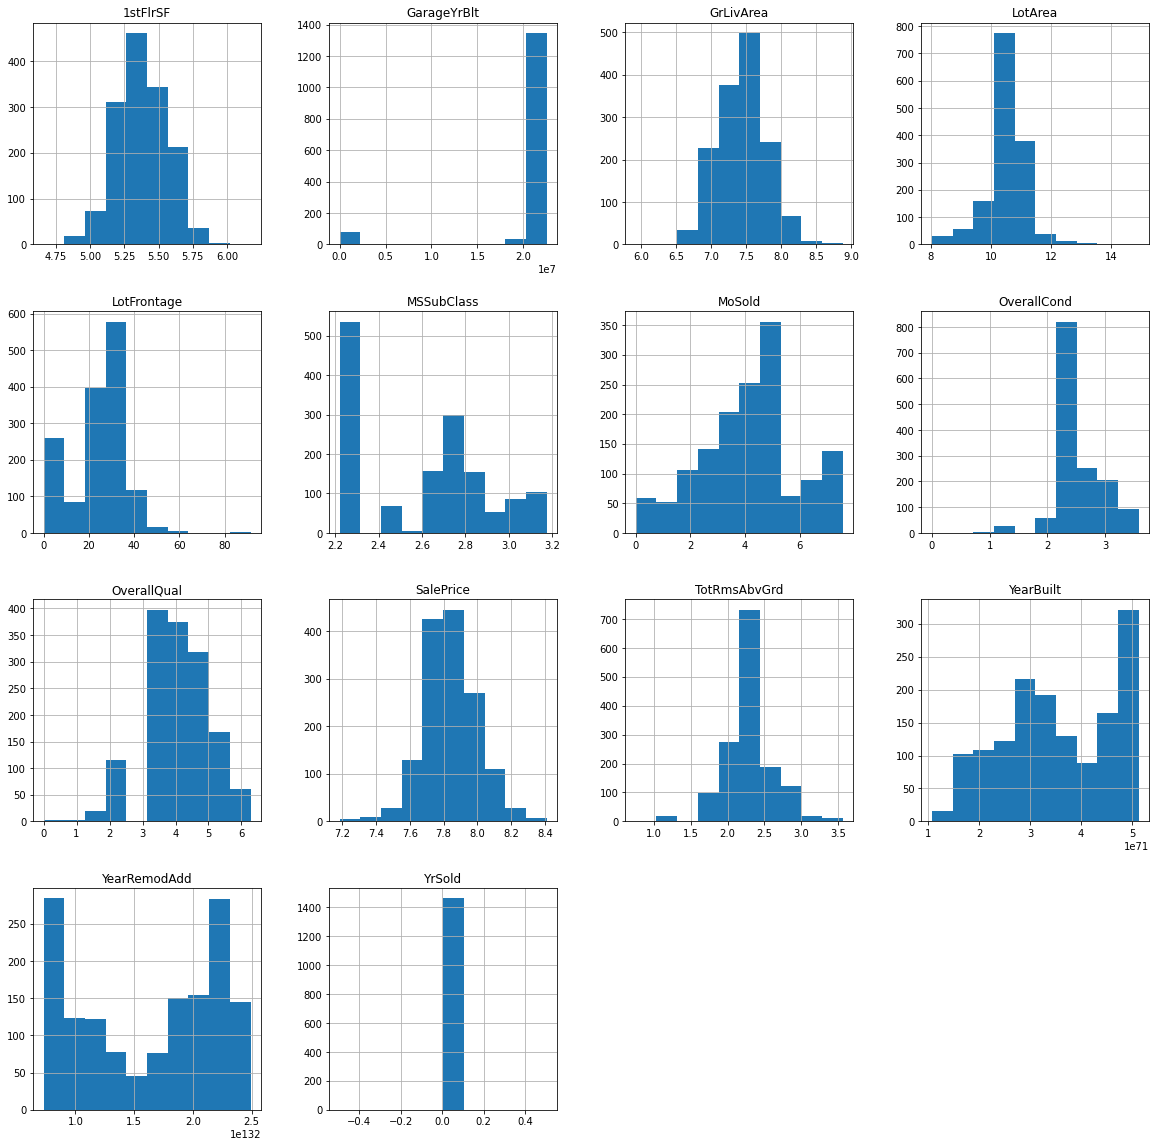

In [22]:
# Check distributions after transformation
trans_bxcx_data.hist(figsize = (20,20))
plt.show()

# **Yeo-Johnson**

Yeo-Johnson tranformation can also be used in negarive value variables.

In [0]:
cols1 = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'SalePrice'
]

In [25]:
trans_yj = PowerTransformer(method='yeo-johnson', standardize=False)
trans_yj.fit(data[cols1].fillna(1))
trans_yj_data = trans_yj.transform(data[cols1].fillna(1))
trans_yj_data = pd.DataFrame(trans_yj_data, columns=cols1)
trans_yj_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,2.661928,32.210544,10.427531,4.691018,2.235408,2.972693,15.235368,-0.0,20.452663,198.284295,5.219622,4.527843,-0.0,7.600484,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.402306,-0.000000,1.144115e+08,2.515980,204.517915,-0.000000,4.227899,-0.000000,-0.0,-0.0,-0.0,-0.0,7.932276
1,2.191299,37.998333,10.596445,4.145378,2.888050,-0.000000,16.750863,-0.0,28.330978,264.601145,5.442275,-0.000000,-0.0,7.284380,-0.000000,0.039486,1.723636,-0.000000,2.832075,0.390035,2.105656,0.607742,1.105001e+08,2.515980,177.329636,4.594581,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,7.877935
2,2.661928,33.389635,10.807340,4.691018,2.235408,2.919113,13.632899,-0.0,35.046589,209.206786,5.261495,4.533735,-0.0,7.645780,0.425418,-0.000000,1.723636,0.352122,2.832075,0.390035,2.105656,0.607742,1.141190e+08,2.515980,222.579733,-0.000000,3.844769,-0.000000,-0.0,-0.0,-0.0,-0.0,7.959281
3,2.720051,30.218500,10.589519,4.691018,2.235408,-0.000000,10.593524,-0.0,39.069656,180.779930,5.286701,4.475937,-0.0,7.604739,0.425418,-0.000000,0.914711,-0.000000,2.832075,0.390035,2.262532,0.607742,1.136809e+08,4.056638,232.664362,-0.000000,3.659326,0.704006,-0.0,-0.0,-0.0,-0.0,7.774637
4,2.661928,39.500034,11.124530,5.216463,2.235408,3.121590,14.902456,-0.0,37.229500,246.150776,5.387108,4.615200,-0.0,7.862156,0.425418,-0.000000,1.723636,0.352122,3.734584,0.390035,2.528459,0.607742,1.139728e+08,4.056638,288.451992,4.310041,4.559556,-0.000000,-0.0,-0.0,-0.0,-0.0,8.002533


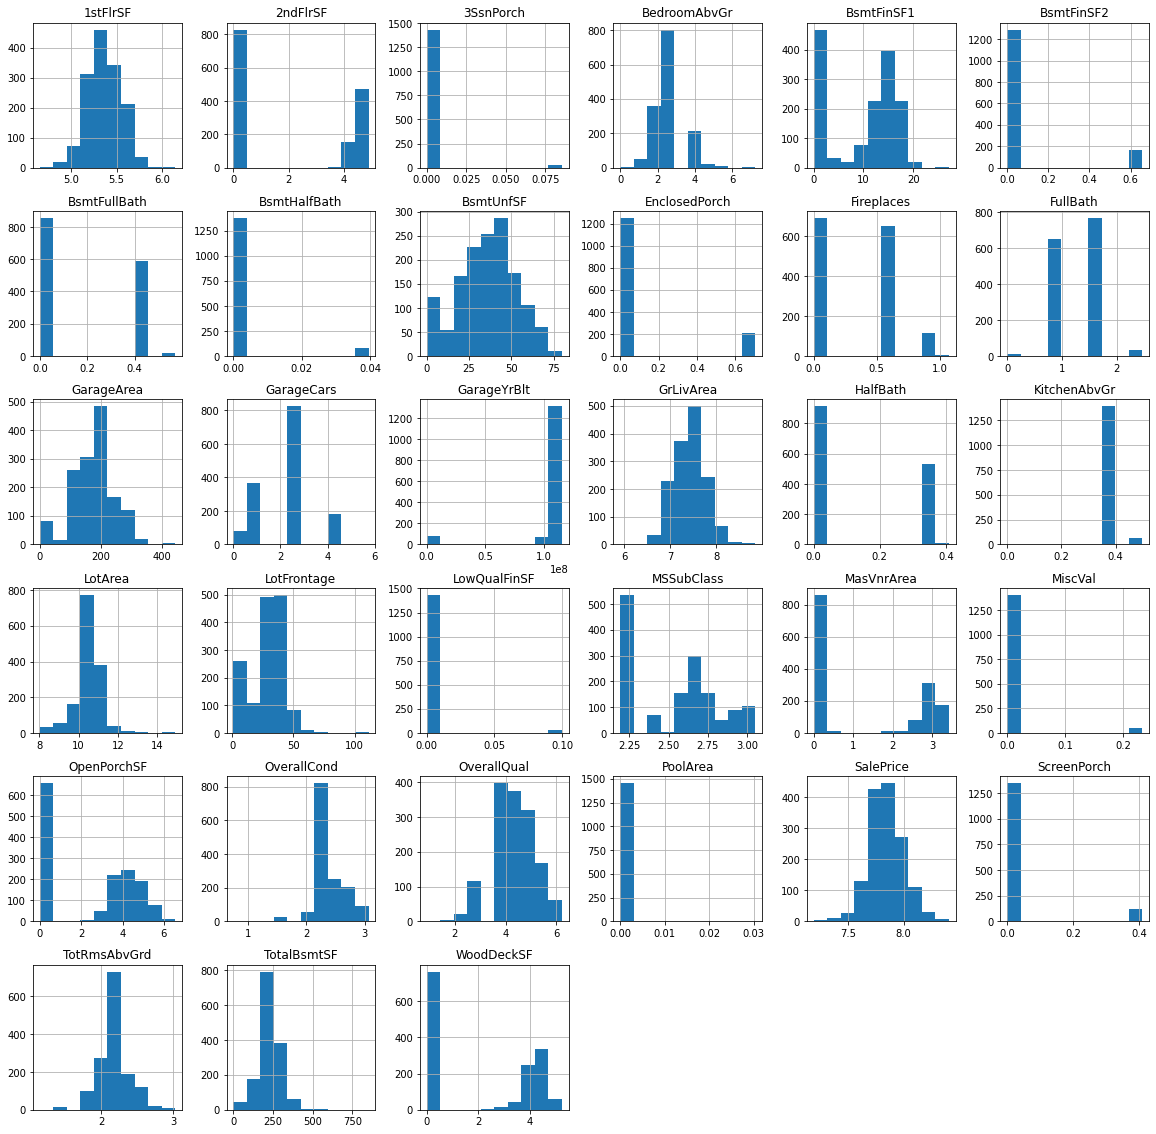

In [26]:
# Check distributions after transformation
trans_yj_data.hist(figsize = (20,20))
plt.show()